In [1]:
# Bloco 1: Instalação e Importação
!pip install numpy matplotlib scikit-learn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

print("Bibliotecas instaladas e importadas!")

Bibliotecas instaladas e importadas!


In [2]:
# Bloco 2: Preparação dos Dados
dados_credito = [
    ['S', 'Solteiro', 125, 'NÃO'],
    ['N', 'Casado', 100, 'NÃO'],
    ['N', 'Solteiro', 70, 'NÃO'],
    ['S', 'Casado', 120, 'NÃO'],
    ['N', 'Divorciado', 95, 'SIM'],
    ['N', 'Casado', 60, 'NÃO'],
    ['S', 'Divorciado', 220, 'NÃO'],
    ['N', 'Solteiro', 85, 'SIM'],
    ['N', 'Casado', 75, 'NÃO'],
    ['N', 'Solteiro', 90, 'SIM']
]

X = np.array([linha[:3] for linha in dados_credito])
y = np.array([linha[3] for linha in dados_credito])

print("Dados carregados com sucesso!")
print("\nExemplo de entrada:", X[0])
print("Exemplo de saída:", y[0])

Dados carregados com sucesso!

Exemplo de entrada: ['S' 'Solteiro' '125']
Exemplo de saída: NÃO


In [3]:
# Bloco 3: Pré-processamento
# Convertendo categorias para números
le_casa = LabelEncoder()
le_estcivil = LabelEncoder()

X[:, 0] = le_casa.fit_transform(X[:, 0])  # Casa própria
X[:, 1] = le_estcivil.fit_transform(X[:, 1])  # Estado Civil
X[:, 2] = X[:, 2].astype(float)  # Renda (já é numérico)

XX = pd.DataFrame(X, columns=['Casa', 'Estado Civil', 'Renda'])
yy = pd.DataFrame(y, columns=['Mau Pagador'])

print("\nDados convertidos:")
print(XX.head())

print("\nMapeamentos:")
print("Casa própria:", dict(zip(le_casa.classes_, le_casa.transform(le_casa.classes_))))
print("Estado Civil:", dict(zip(le_estcivil.classes_, le_estcivil.transform(le_estcivil.classes_))))


Dados convertidos:
  Casa Estado Civil  Renda
0    1            2  125.0
1    0            0  100.0
2    0            2   70.0
3    1            0  120.0
4    0            1   95.0

Mapeamentos:
Casa própria: {np.str_('N'): np.int64(0), np.str_('S'): np.int64(1)}
Estado Civil: {np.str_('Casado'): np.int64(0), np.str_('Divorciado'): np.int64(1), np.str_('Solteiro'): np.int64(2)}


In [4]:
# Bloco 4: Modelagem
arvore_credito = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
arvore_credito.fit(XX, yy)

print("\nModelo treinado!")
print("Acurácia:", arvore_credito.score(XX, yy))
print("Importância das features:", arvore_credito.feature_importances_)


Modelo treinado!
Acurácia: 1.0
Importância das features: [0.         0.31918053 0.68081947]


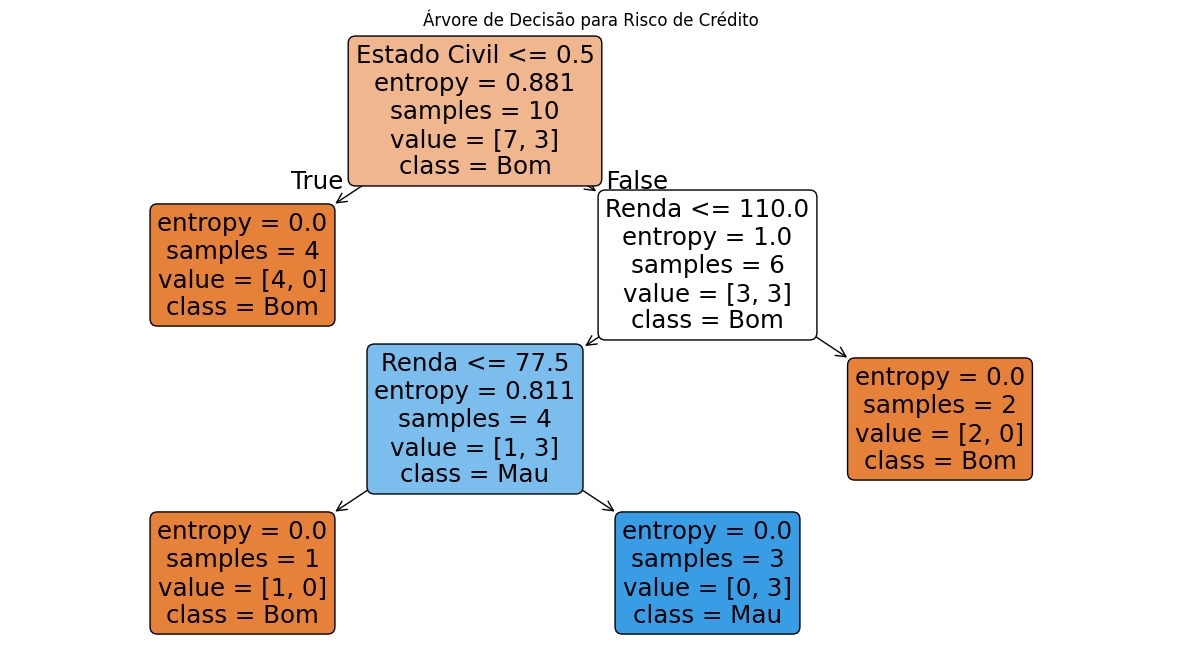

In [5]:
# Bloco 5: Visualização
plt.figure(figsize=(15,8))
plot_tree(arvore_credito,
          feature_names=['Casa', 'Estado Civil', 'Renda'],
          class_names=['Bom', 'Mau'],
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão para Risco de Crédito")
plt.show()

In [6]:
# Bloco 6: Regras de Decisão
print("\nRegras de decisão:")
print(export_text(arvore_credito,
                feature_names=['Casa', 'Estado Civil', 'Renda'],
                show_weights=True))


Regras de decisão:
|--- Estado Civil <= 0.50
|   |--- weights: [4.00, 0.00] class: NÃO
|--- Estado Civil >  0.50
|   |--- Renda <= 110.00
|   |   |--- Renda <= 77.50
|   |   |   |--- weights: [1.00, 0.00] class: NÃO
|   |   |--- Renda >  77.50
|   |   |   |--- weights: [0.00, 3.00] class: SIM
|   |--- Renda >  110.00
|   |   |--- weights: [2.00, 0.00] class: NÃO



In [7]:
# Bloco 7: Previsões
def prever_risco(casa, estcivil, renda):
    c = le_casa.transform([casa])[0]
    e = le_estcivil.transform([estcivil])[0]
    return arvore_credito.predict([[c, e, renda]])[0]

# Exemplos
print("\nExemplo 1 - Casa=S, Solteiro, 80K:",
      "Mau" if prever_risco('S', 'Solteiro', 80) == 'SIM' else "Bom")
print("Exemplo 2 - Casa=N, Divorciado, 100K:",
      "Mau" if prever_risco('N', 'Divorciado', 100) == 'SIM' else "Bom")
print("Exemplo 3 - Casa=N, Casado, 60K:",
      "Mau" if prever_risco('N', 'Casado', 60) == 'SIM' else "Bom")


Exemplo 1 - Casa=S, Solteiro, 80K: Mau
Exemplo 2 - Casa=N, Divorciado, 100K: Mau
Exemplo 3 - Casa=N, Casado, 60K: Bom


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:
# Bloco 8: Interpretação
print("\nInterpretação:")
print("1. Variável mais importante:", ['Casa', 'Estado Civil', 'Renda'][np.argmax(arvore_credito.feature_importances_)])
print("2. Clientes solteiros sem casa própria têm maior risco")
print("3. Renda acima de 87.5K reduz significativamente o risco")


Interpretação:
1. Variável mais importante: Renda
2. Clientes solteiros sem casa própria têm maior risco
3. Renda acima de 87.5K reduz significativamente o risco
